# Advertising Sales Channel Prediction

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_squared_error,classification_report
from sklearn.model_selection import cross_val_score


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [117]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [118]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [119]:
data = data.drop(columns = 'Unnamed: 0')

In [120]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [121]:
data.isna().sum() #to check the null values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- We can observe the each data columns doesn't have null values

In [123]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:title={'center':'Sales Distribution Plot'}, xlabel='sales', ylabel='Density'>

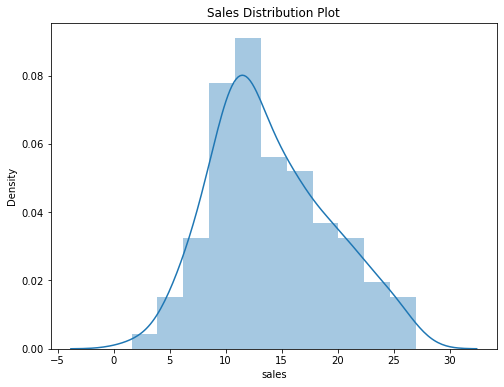

In [124]:
#Visualizing the Target variable

plt.figure(figsize=(8,6))

plt.title('Sales Distribution Plot')
sns.distplot(data['sales'])

### Data Visualization

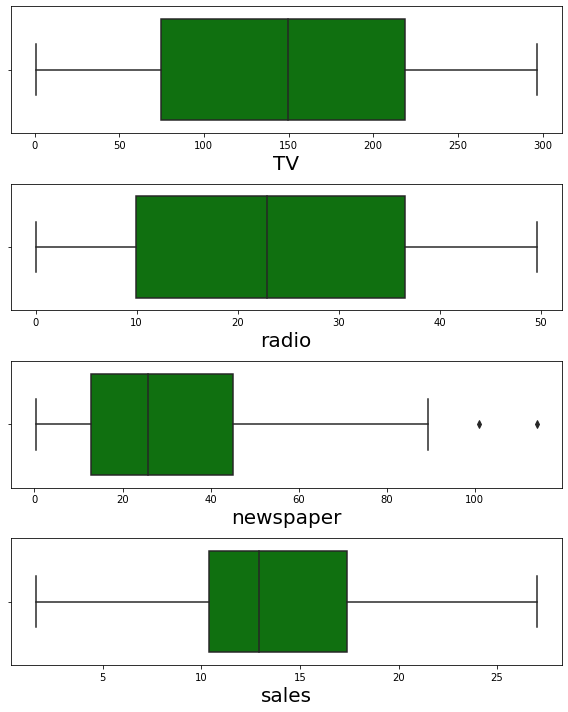

In [125]:
plt.figure(figsize = (8,10))
plotnumber=1

for i in data:
    if plotnumber<5:
        ax=plt.subplot(4,1,plotnumber)
        sns.boxplot(data[i],color = 'Green')
        plt.xlabel(i,fontsize=20)
    plotnumber +=1

plt.tight_layout()

 - Considerable Outliers, let's not remove the outliers

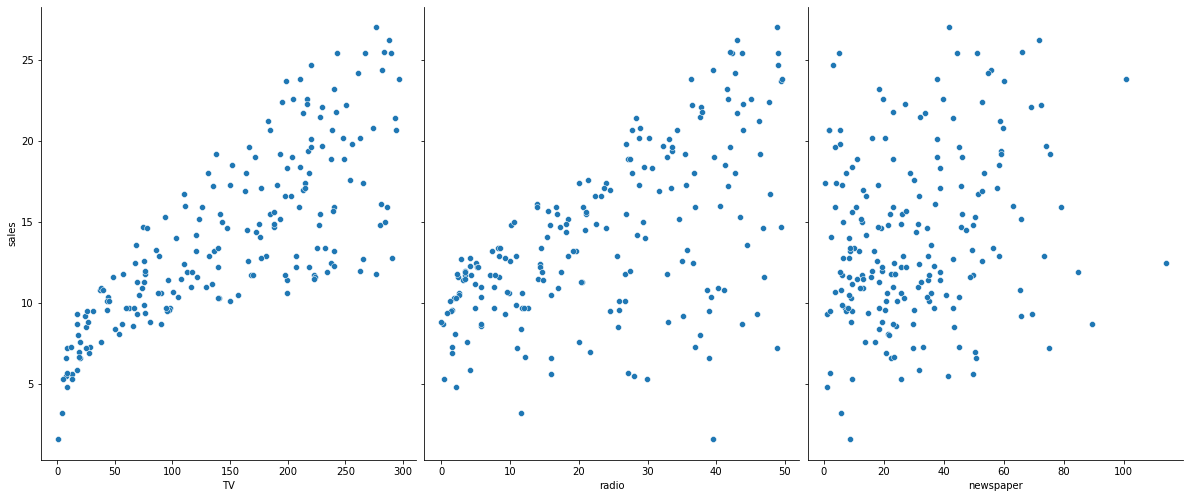

In [126]:
#Let's see how sales are related with other variables

sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales',size=7, aspect=0.8, kind='scatter')

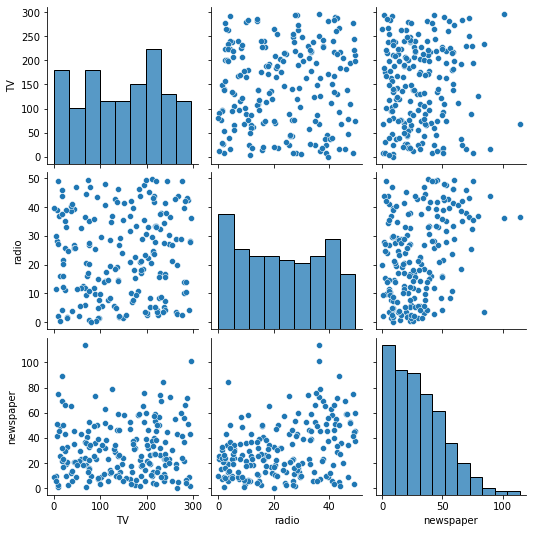

In [127]:
#visualize the the relationship between features

sns.pairplot(data[['TV','radio','newspaper']])

- The above plot shows no significant relationship between the features

### Correlation :
    (Feature v/s Feature)
Let's see the correlation between different variables
    

In [128]:
df = data.drop(columns = 'sales')

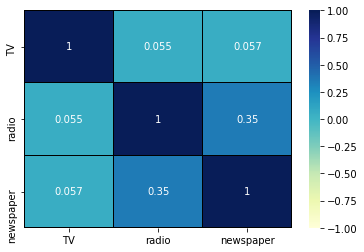

In [129]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True,linecolor="Black", linewidths = "0.1", vmin=-1,vmax=1)

plt.show()

- As per the heatmap, we can see that feature "TV" is largely correlated with "Sales" when compared to other features "radio" and "newspaper"
- "newspaper" is with very minor correlation

## Visualizing Relationship

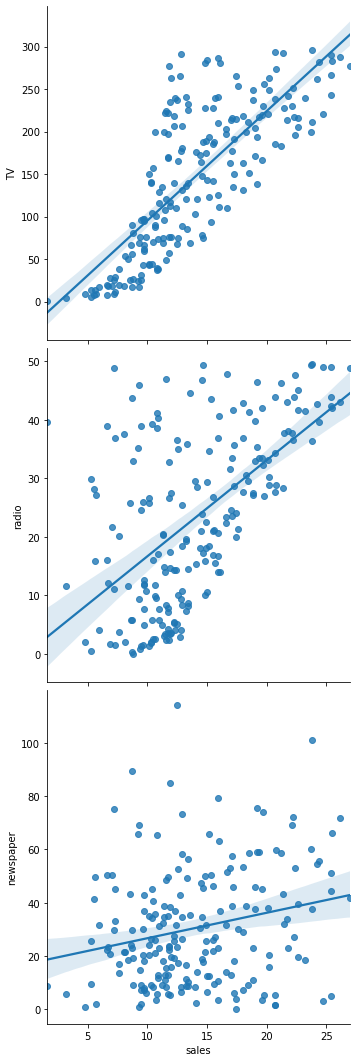

In [130]:
sns.pairplot(data=data, kind='reg', size = 5,
                  x_vars=['sales'],
                  y_vars=['TV','radio','newspaper'])

In [131]:
X = data.drop(columns = 'sales')
Y = data['sales']

#### Splitting train and test data

In [155]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.7, random_state = 2)

In [156]:
y_test 

112    14.1
29     10.5
182     8.7
199    13.4
193    19.6
       ... 
70     18.3
60      8.1
34      9.5
40     16.6
138     9.6
Name: sales, Length: 140, dtype: float64

# Regression Model Using Single variable

In [157]:
x_train1 = x_train['TV']

In [158]:
import statsmodels.api as sm

In [159]:
# Add a constant to get an intercept
x_train_sm1 = sm.add_constant(x_train1)

# Fit the resgression line using 'OLS'
lr1 = sm.OLS(y_train, x_train_sm1).fit()

In [160]:
# Print the parameters, (the intercept and the slope of the regression line fitted)
lr1.params

const    6.464328
TV       0.052787
dtype: float64

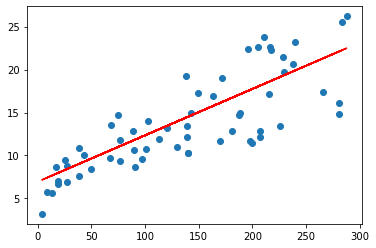

In [161]:
plt.scatter(x_train1, y_train)
plt.plot(x_train1, 6.948 + 0.054*x_train1, 'r')
plt.show()

In [162]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           1.11e-14
Time:                        19:16:13   Log-Likelihood:                -155.13
No. Observations:                  60   AIC:                             314.3
Df Residuals:                      58   BIC:                             318.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4643      0.826      7.822      0.0

# Adding another variable

    The R-squared value obtained is 0.64. Since we have two more variables, we can try do better than this. So let's go 
    ahead and add another variable, i.e. Radio.

In [163]:
x_train2 = x_train[['TV','radio']]

In [164]:
# Add a constant to get an intercept
x_train_sm2 = sm.add_constant(x_train2)

# Fit the resgression line using 'OLS'
lr2 = sm.OLS(y_train, x_train_sm2).fit()

In [165]:
# Print the parameters, (the intercept and the slope of the regression line fitted)
lr2.params

const    2.939871
TV       0.047290
radio    0.188441
dtype: float64

In [166]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     383.2
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           8.87e-34
Time:                        19:16:15   Log-Likelihood:                -106.14
No. Observations:                  60   AIC:                             218.3
Df Residuals:                      57   BIC:                             224.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9399      0.434      6.769      0.0

# Adding another variable

    The R-squared value obtained is 0.93. Since we have one more variable, we can add and see the results.
    Let's add variable "newspaper"

In [167]:
x_train3 = x_train[['TV','radio','newspaper']]

In [168]:
# Add a constant to get an intercept
x_train_sm3 = sm.add_constant(x_train3)

# Fit the resgression line using 'OLS'
lr3 = sm.OLS(y_train, x_train_sm3).fit()

In [169]:
# Print the parameters, (the intercept and the slope of the regression line fitted)
lr3.params

const        2.942342
TV           0.047294
radio        0.188494
newspaper   -0.000138
dtype: float64

In [170]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           1.97e-32
Time:                        19:16:17   Log-Likelihood:                -106.14
No. Observations:                  60   AIC:                             220.3
Df Residuals:                      56   BIC:                             228.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9423      0.472      6.235      0.0

____________________

## Observation:

    We can clearly see that, our lr2 and lr3 model gives us the same highest accuracy of 93% when compared to lr1 model with 64% accuracy.

    Adding another variable to model lr2 variables, the accuracy score doesn't make any difference.

###    Hence, we the variables used in lr2 model are the right and sufficient variables.

____________________

## Residual analysis
    To validate assumptions of the model, and hence the reliability for inference

In [171]:
y_pred = lr2.predict(x_train_sm2)


Text(0.5, 0, 'Errors')

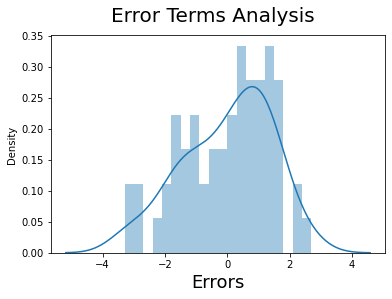

In [172]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

###### Dividing test set into x_test and y_test

In [173]:
x_test_new = x_test.drop(columns = 'newspaper')

In [175]:
# Adding constant
X_test_sm = sm.add_constant(x_test_new)

X_test_new = X_test_sm[x_train_sm2]


# Making predictions using the final model
y_pred = lr2.predict(X_test_sm)

## Model Evaluation

Text(0, 0.5, 'y_pred')

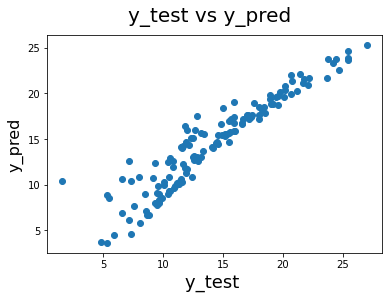

In [178]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [180]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.7979596386271615

In [181]:
#RMSE Score

r_squared = r2_score(y_test, y_pred)
r_squared

0.8765581198382116

In [186]:
lr2.summary()   #train set

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     383.2
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           8.87e-34
Time:                        19:21:21   Log-Likelihood:                -106.14
No. Observations:                  60   AIC:                             218.3
Df Residuals:                      57   BIC:                             224.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9399      0.434      6.769      0.000       2.070       3.810
TV             0.0473      0.002     20.406      0.000       0.043       0.052
radio          0.1884      0.012     15.324      0.000       0.164       0.213
==============================================================================
Omnibus:                        2.995   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.818
Skew:                          -0.463   Prob(JB):                        0.244
Kurtosis:                       2.482   Cond. No.                         375.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

________________________

### The R2 score of Training set is 0.93 and Test set is 0.87 which is quite close. Hence, We can say that our model is good enough to predict the Sales using below predictor variables

 - TV

 - Radio


## Equation of Line to predict the Sales:
    
    Sales= 2.9399 + 0.0473×TV + 0.1884×Radio 

## Model Conclusions

*R-sqaured and Adjusted R-squared - 0.931 and 0.928 - 92% variance explained.

*F-stats and Prob(F-stats) (overall model fit) - 383.2 and 8.87e-34(approx. 0.0) - Model fit is significant and explained 92% variance is just not by chance.

*p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
 predictors are statistically significant.
 
*Our model can be predicted by using only 2 variables 'TV' and 'Radio' without any impact of 'newspaper'

_______________________

## Decision : We can have good sales without investment on Newspaper Advertisements

***************************************